## ASSIGNMENT 6 - TOPIC MODELLING

Discovering latent topics in text data using NMF, extracting patterns and insights, aiding in content understanding and categorization.

- **Data Import and Preview**: Loads a CSV file containing UN General Debates speeches, displaying the first 20 rows to inspect the structure and content.
- **Printing Text Preview**: Prints the first 400 characters of specific speeches to understand the text's format and content.
- **Text Preprocessing**: Splits speeches into paragraphs, calculates the number of paragraphs per speech, and applies text cleaning.
- **TF-IDF Vectorization**: Transforms the cleaned text data into numerical vectors using TF-IDF to highlight important words while considering their document frequency.
- **Dataframe Creation for Paragraphs**: Constructs a new dataframe that lists each paragraph along with its corresponding year, facilitating finer-grained analysis.
- **TF-IDF Vectorization for Paragraphs**: Applies TF-IDF vectorization specifically to paragraphs, preparing for detailed text analysis.
- **NMF Model Fitting for Text Data**: Fits a Non-negative Matrix Factorization (NMF) model to identify latent topics within the speeches, using the TF-IDF vectors as input.
- **Topic Display Function Definition**: Defines a function to display the top words for each topic discovered by the NMF model, aiding in interpreting the topics' themes.
- **NMF Model Fitting for Paragraphs**: Similar to the full-text NMF model but focuses on paragraph-level data to uncover more specific or nuanced topics.
- **Topic Contribution Calculation**: Calculates and displays the percentage contribution of each topic across all texts or paragraphs, giving insight into the prevalence of topics.

### DATA IMPORT AND PREVIEW

In [7]:
# Importing pandas library, reading a CSV file, and displaying the first 20 rows

import pandas as pd
file = 'sentimenttweets.csv'
df = pd.read_csv(file)
df.head(20)

Index                                           message   \
0     106  just had a real good moment. i missssssssss hi...   
1     217         is reading manga  http://plurk.com/p/mzp1e   
2     220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3     288  @lapcat Need to send 'em to my accountant tomo...   
4     540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
5     624              so sleepy. good times tonight though    
6     701  @SilkCharm re: #nbn as someone already said, d...   
7     808                 23 or 24ï¿½C possible today. Nice    
8    1193        nite twitterville  workout in the am  -ciao   
9    1324    @daNanner Night, darlin'!  Sweet dreams to you    
10   1332                           Good morning everybody!    
11   1368  Finally! I just created my WordPress Blog. The...   
12   1578  kisha they cnt get over u til they get out frm...   
13   1595  @nicolerichie Yes i remember that band, It was...   
14   1861             I really love reflections and shadows    
15   1889  @blueaero ooo it's fantasy?  i like fantasy no...   
16   1899  @rokchic28 no probs, I sell nothing other than...   
17   1919  @shipovalov &quot;NOKLA connecting people&quot...   
18   1992  Once again stayed up to late and have to start...   
19   2097  @Kal_Penn I just read about your new job, CONG...   

    label (depression result)  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0  
10                          0  
11                          0  
12                          0  
13                          0  
14                          0  
15                          0  
16                          0  
17                          0  
18                          0  
19                          0

### PRINTING TEXT PREVIEW

In [10]:
df.columns

Index(['Index', 'message ', 'label (depression result)'], dtype='object')

In [11]:
# Printing the first 400 characters of the text column for specific rows using iloc

print(repr(df.iloc[2666]["message "][0:400]))
print(repr(df.iloc[4726]["message "][0:400]))

'I forgot how relaxing watching the ducks can be. Classic when grandma tries to get away from the geese '
'@evilbride no its not real lol, temporary but i made it myself  lol'


### TEXT PREPROCESSING

In [12]:
# Importing re module, splitting 'text' column into paragraphs, and counting number of paragraphs in each row

import re
df["paragraphs"] = df["message "].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

### TF-IDF VECTORIZATION

Transforming text data into numerical vectors based on term frequency-inverse document frequency (TF-IDF) to capture word importance while considering document frequency, enabling meaningful analysis and machine learning tasks.

In [13]:
# Creating a TF-IDF vectorizer with specified parameters and transforming the text data

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

# Use the list of stop words with the TfidfVectorizer
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['message '])
print(tfidf_text_vectors.shape)

(10314, 2494)


/Users/sid/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


### DATAFRAME CREATION

In [14]:
# Creating a DataFrame 'paragraph_df' from the 'paragraphs' column of the original DataFrame 'df', 
# associating each paragraph with its corresponding year

paragraph_df = pd.DataFrame([{ "message ": paragraph, "Index": year } 
                               for paragraphs, year in zip(df["paragraphs"], df["Index"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

message   Index
0  just had a real good moment. i missssssssss hi...    106
1         is reading manga  http://plurk.com/p/mzp1e    217
2  @comeagainjen http://twitpic.com/2y2lx - http:...    220
3  @lapcat Need to send 'em to my accountant tomo...    288
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder    540
5              so sleepy. good times tonight though     624
6  @SilkCharm re: #nbn as someone already said, d...    701
7                 23 or 24ï¿½C possible today. Nice     808
8        nite twitterville  workout in the am  -ciao   1193
9    @daNanner Night, darlin'!  Sweet dreams to you    1324

### TF-IDF VECTORIZATION FOR PARAGRAPHS

In [15]:
# Creating a TF-IDF vectorizer for paragraphs with specified parameters and transforming the text data

tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["message "])
print(tfidf_para_vectors.shape)

(10314, 2492)


### NMF MODEL FITTING FOR TEXT DATA

In [16]:
# Creating an NMF model with 10 components and fitting it to TF-IDF vectors of text data, then obtaining the factorized matrices

from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

### TOPIC DISPLAY FUNCTION DEFINITION

In [17]:
# Defining a function to display the top words for each topic based on the NMF model components and feature names

def display_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]]*100.0/total)))

# Assuming tfidf_para_vectorizer is your TfidfVectorizer and is already fitted
feature_names = tfidf_para_vectorizer.get_feature_names_out()

# Call the function with the NMF model and the feature names
display_topics(nmf_text_model, feature_names)


Topic 00
  design (14.73)
  anxiety (2.21)
  emotional (1.58)
  facts (1.14)
  human (1.08)

Topic 01
  gosh (22.71)
  mountain (10.71)
  nite (3.13)
  ma (2.04)
  hot (1.12)

Topic 02
  theory (36.79)
  hair (2.48)
  following (2.17)
  forever (1.60)
  hahaha (1.53)

Topic 03
  huh (13.36)
  come (6.80)
  twitterverse (6.25)
  mail (4.26)
  bitch (4.01)

Topic 04
  lower (26.78)
  lyrics (1.45)
  amazing (1.17)
  hair (0.98)
  hahaha (0.95)

Topic 05
  deal (18.74)
  tommcfly (4.32)
  hate (4.24)
  group (3.27)
  beautiful (1.75)

Topic 06
  rainbow (28.70)
  soon (0.70)
  msn (0.66)
  san (0.64)
  wave (0.57)

Topic 07
  looked (24.56)
  include (1.29)
  wave (1.16)
  older (1.03)
  years (0.82)

Topic 08
  twitterâ (13.67)
  come (10.12)
  pictures (6.89)
  human (5.91)
  step (5.24)

Topic 09
  link (2.99)
  kyle (2.24)
  goodmorning (2.02)
  dont (1.67)
  tip (1.61)


### NMF MODEL FITTING FOR PARAGRAPHS

In [18]:
# Creating an NMF model for paragraphs, fitting it to TF-IDF vectors of paragraphs, then displaying the top words for each topic

nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_text_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_text_model.components_
display_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  depression (14.11)
  anxiety (2.18)
  emoji (1.58)
  face (1.14)
  https (1.09)

Topic 01
  good (21.17)
  morning (10.12)
  night (3.08)
  luck (1.90)
  time (1.25)

Topic 02
  thanks (34.76)
  haha (2.62)
  follow (2.12)
  followfriday (1.51)
  guys (1.51)

Topic 03
  http (13.12)
  com (6.66)
  twitpic (6.12)
  ly (4.18)
  bit (3.92)

Topic 04
  love (23.15)
  lt (1.35)
  haha (1.17)
  amazing (1.12)
  new (1.09)

Topic 05
  day (15.41)
  today (3.92)
  happy (3.53)
  great (3.16)
  going (1.91)

Topic 06
  quot (27.25)
  song (0.65)
  movie (0.64)
  said (0.60)
  think (0.59)

Topic 07
  just (5.05)
  like (2.52)
  got (2.05)
  know (2.04)
  don (1.59)

Topic 08
  twitter (13.62)
  com (10.06)
  pic (6.92)
  https (5.83)
  status (5.21)

Topic 09
  lol (21.75)
  going (1.84)
  im (1.79)
  watching (1.19)
  oh (0.93)


### TOPIC CONTRIBUTION CALCULATION

In [19]:
# Calculating the percentage contribution of each topic in the text data

W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.42428919,  7.38725114,  6.8505984 , 10.35099972,  7.42106915,
       11.45781293,  5.54561647,  7.34356119,  8.92505048, 23.29375132])

### TOPIC CONTRIBUTION CALCULATION

In [20]:
# Calculating the percentage contribution of each topic in the paragraph data

W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([11.44986714,  7.96106784,  7.27248431, 10.21930052,  8.15863355,
       13.17039319,  6.30894094, 19.72963602,  8.50154063,  7.22813586])

### COUNT VECTORIZATION

In [22]:
# Converts spaCy stop words to a list and initializes a CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words to a list

stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["message "])
count_para_vectors.shape

/Users/sid/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(10314, 2494)

### LDA MODEL FITTING

In [23]:
# Fits the LDA model to the count vectors of paragraph data

from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

### TOPIC DISPLAY FUNCTION

In [24]:
# Takes the LDA model (model), the vectorizer used to generate features

def display_topics(model, vectorizer, no_top_words=5):
    feature_names = vectorizer.get_feature_names_out()
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

display_topics(lda_para_model, count_para_vectorizer)


Topic 00
  http (7.82)
  com (5.78)
  depression (2.74)
  love (2.63)
  twitpic (2.15)

Topic 01
  good (3.71)
  night (3.20)
  thank (1.97)
  thanks (1.53)
  awesome (1.53)

Topic 02
  depression (10.37)
  anxiety (3.12)
  https (2.38)
  http (1.76)
  people (1.60)

Topic 03
  day (6.61)
  emoji (3.90)
  face (2.76)
  watching (2.15)
  today (1.89)

Topic 04
  quot (3.12)
  time (2.75)
  fun (2.54)
  good (2.41)
  amp (1.90)

Topic 05
  depression (3.93)
  got (2.58)
  better (1.77)
  way (1.02)
  youtube (1.01)

Topic 06
  depression (11.49)
  twitter (9.63)
  com (7.96)
  pic (4.54)
  https (4.16)

Topic 07
  ll (3.04)
  haha (2.11)
  work (1.93)
  lt (1.74)
  cool (1.70)

Topic 08
  don (3.86)
  morning (3.36)
  good (3.31)
  like (3.06)
  depression (2.81)

Topic 09
  depression (4.69)
  like (2.45)
  lol (1.99)
  feel (1.75)
  going (1.66)


### TOPIC DISTRIBUTION CALCULATION

In [25]:
# Calculates the percentage distribution of topics across paragraphs.

W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.67830144, 13.80617968,  8.40309915,  8.4200199 , 10.59055478,
        8.3761451 ,  8.4874533 , 12.31580188,  9.45159462, 11.47085015])

### WORDCLOUD GENERATION

In [26]:
# Generates word clouds for each topic in a given topic model.

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/4081123732.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### WORDCLOUD GENERATION

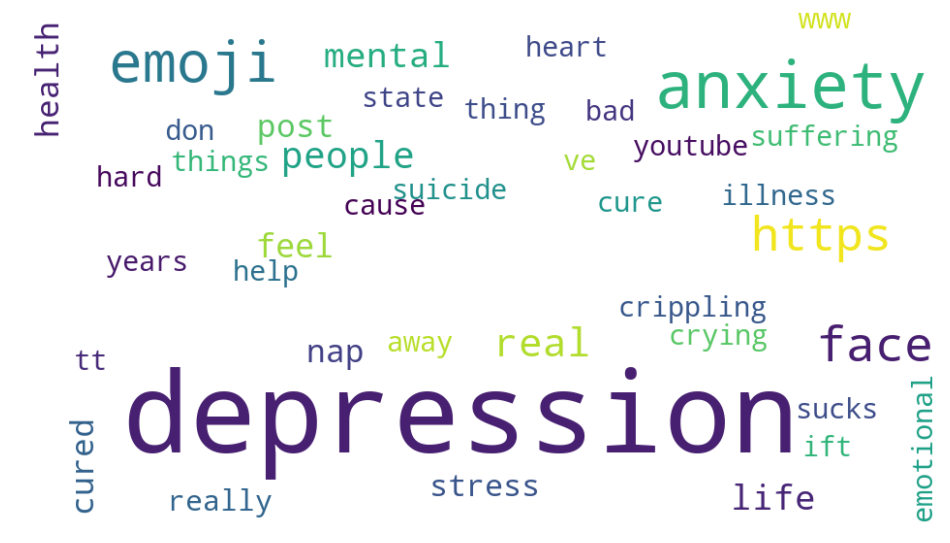

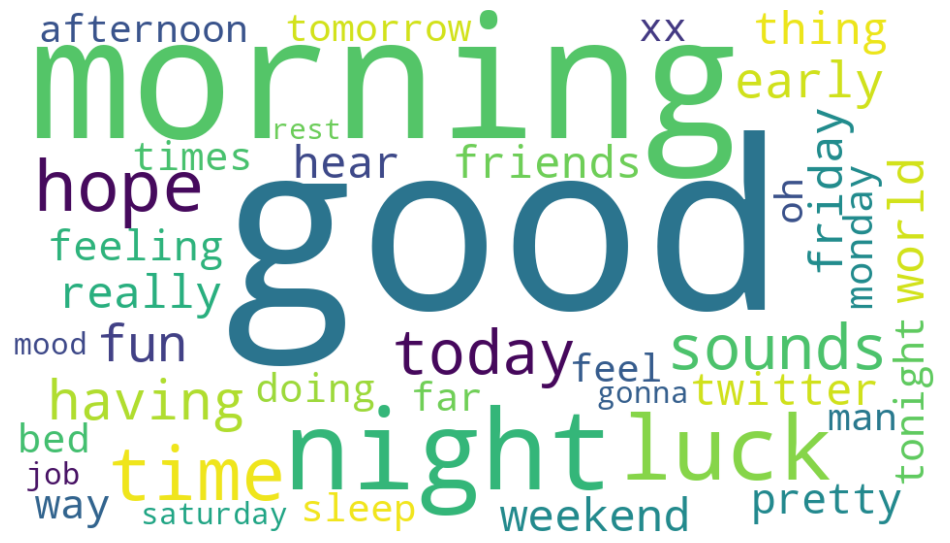

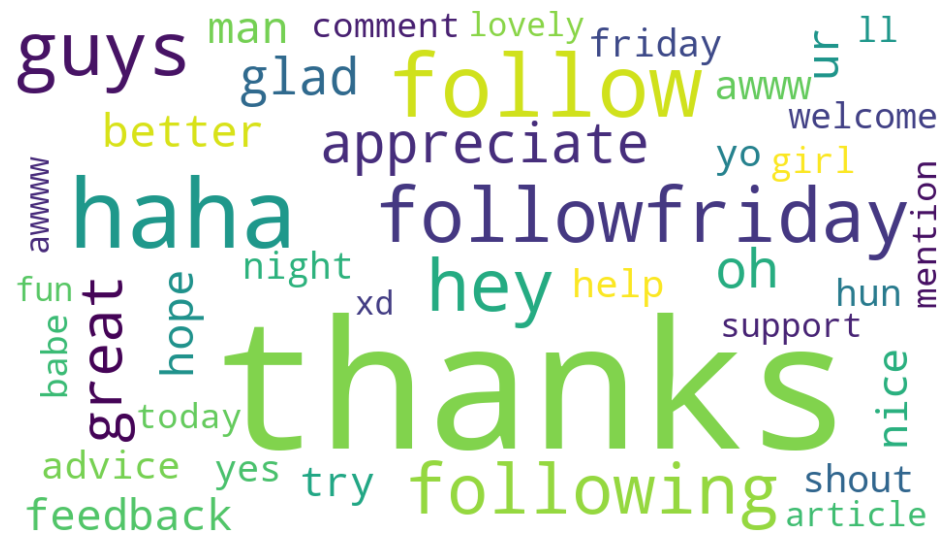

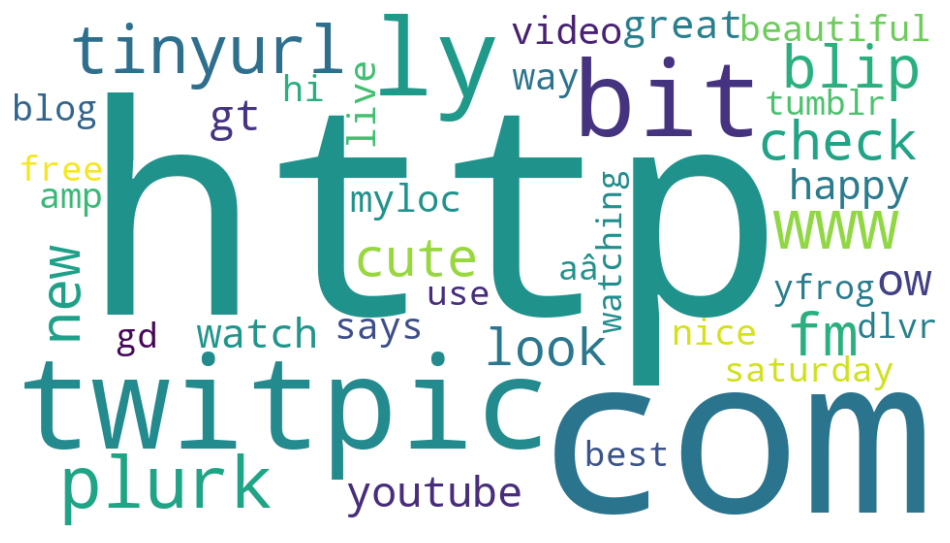

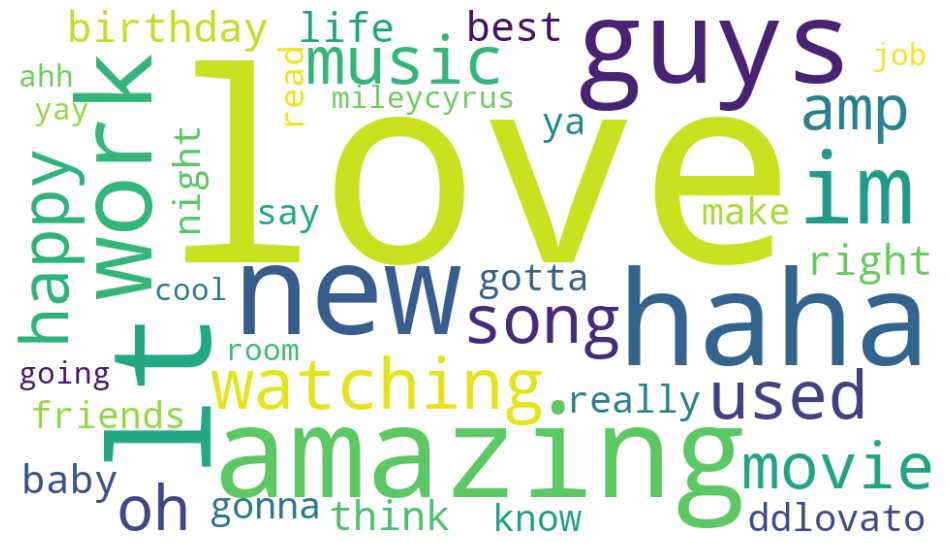

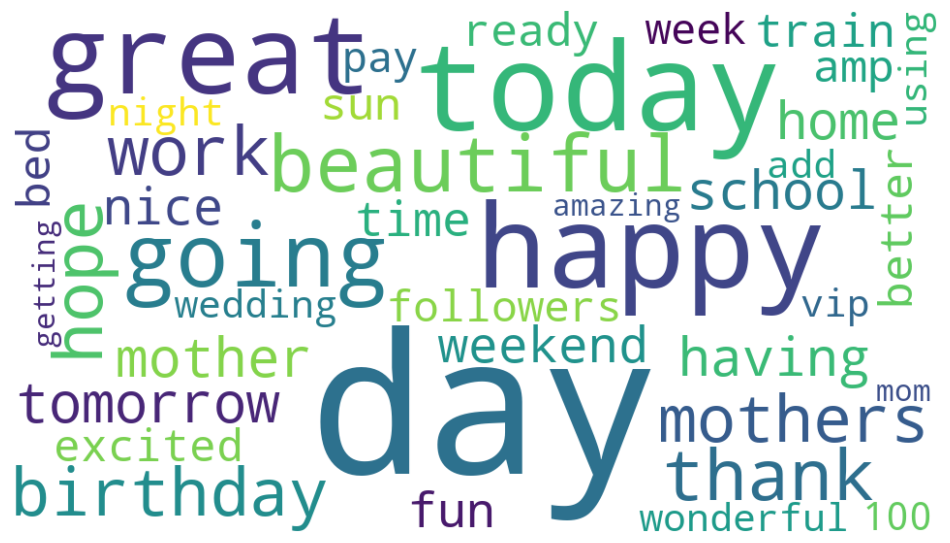

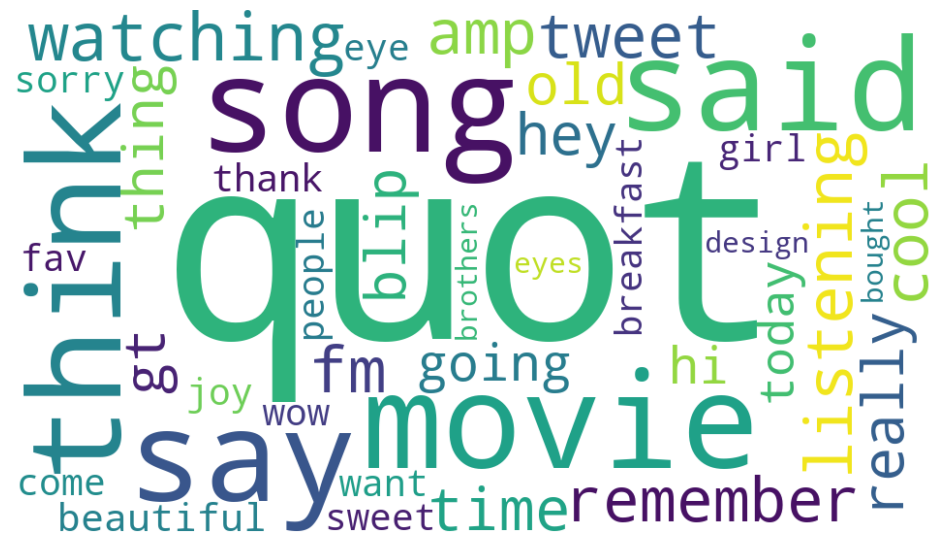

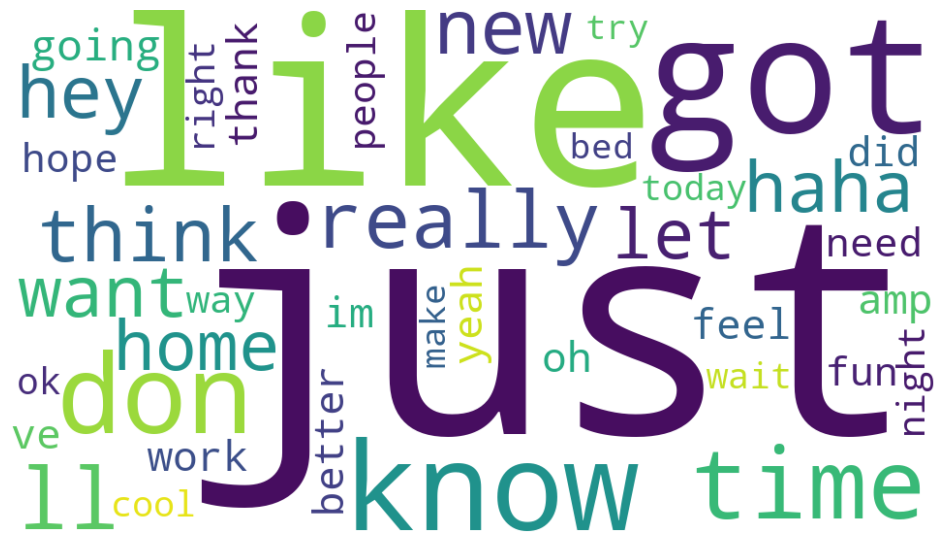

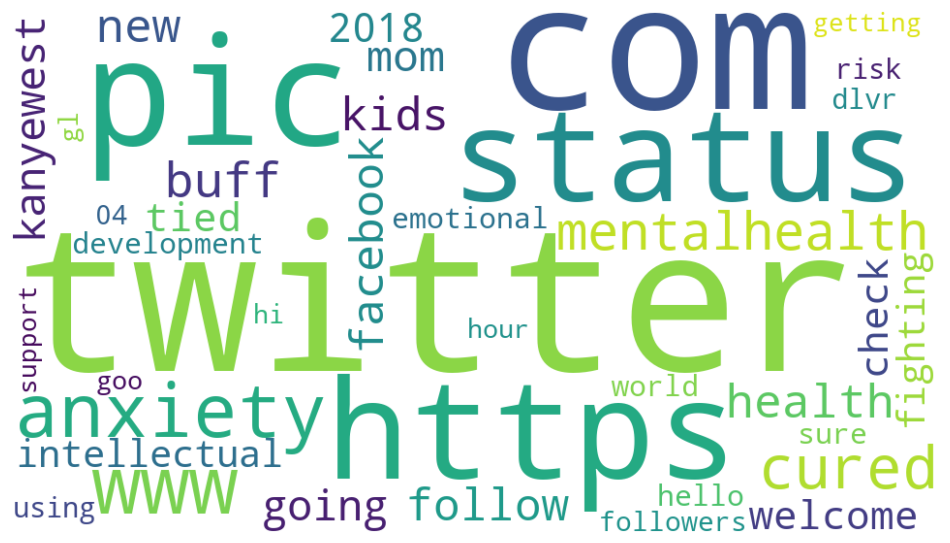

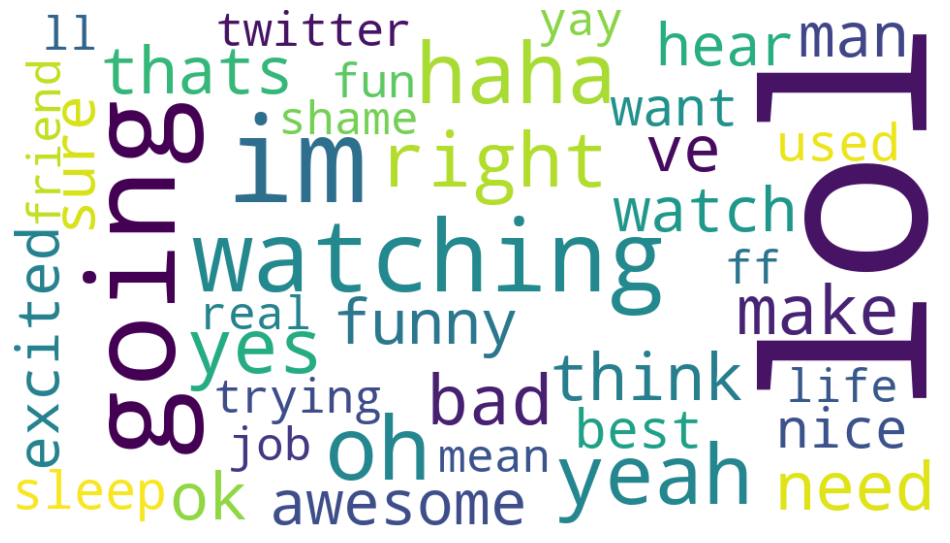

In [27]:
# Iterates over each topic in the model, retrieves the top words and their frequencies, and generates a word cloud based

wordcloud_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())

### WORDCLOUD GENERATION FOR LDA PARA MODEL

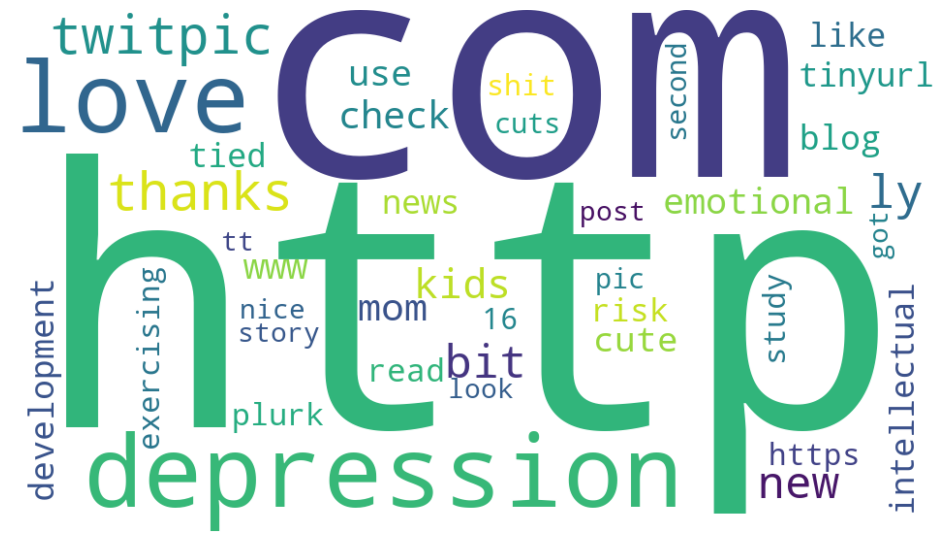

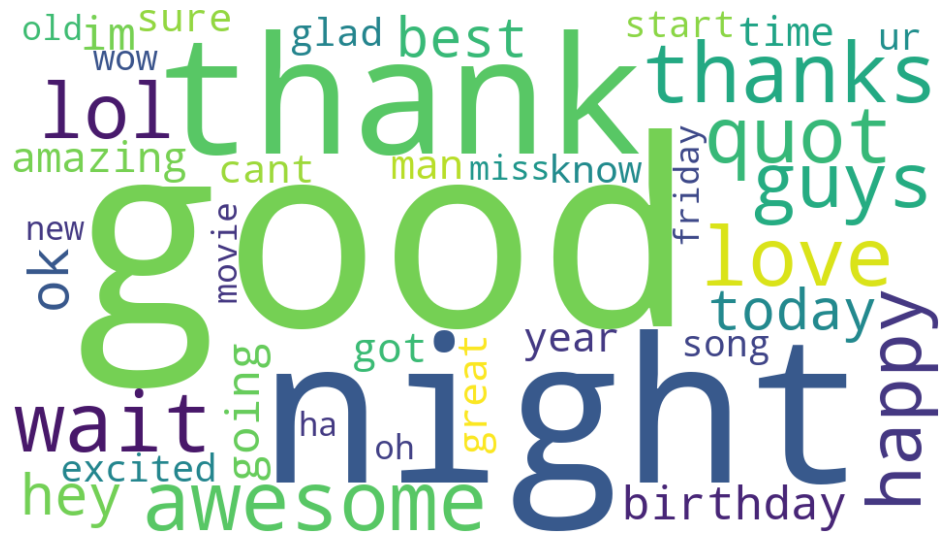

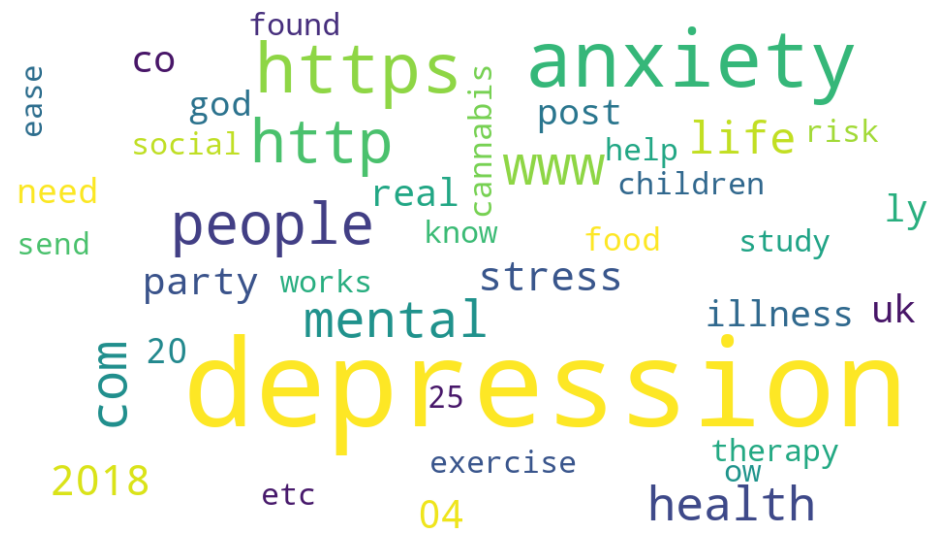

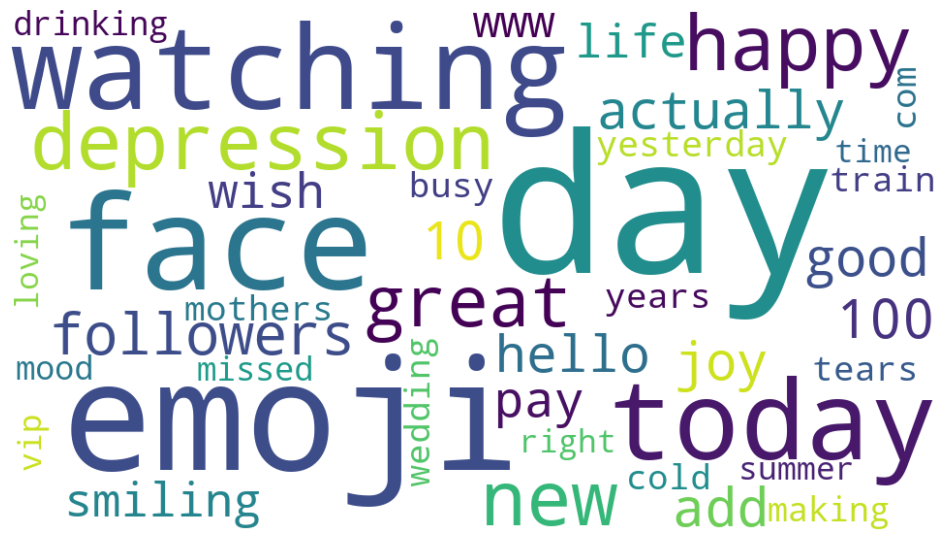

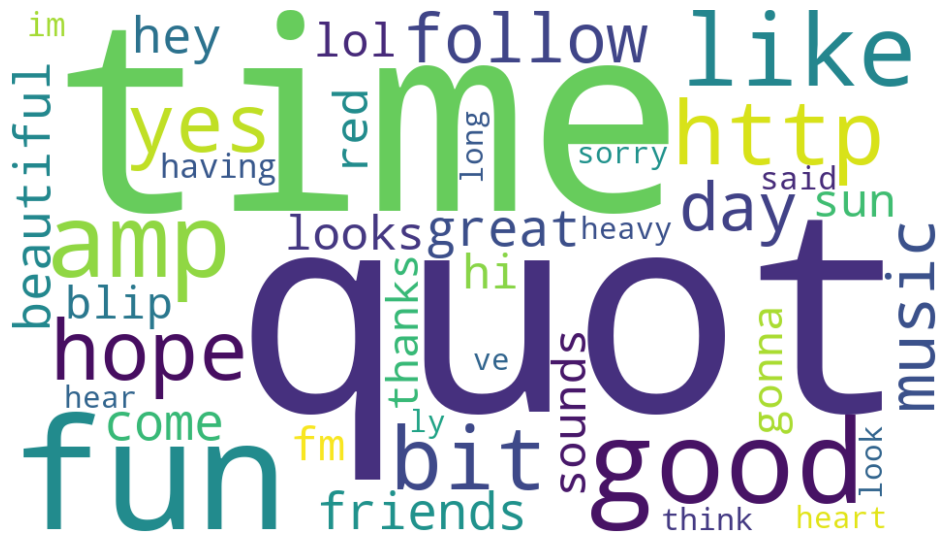

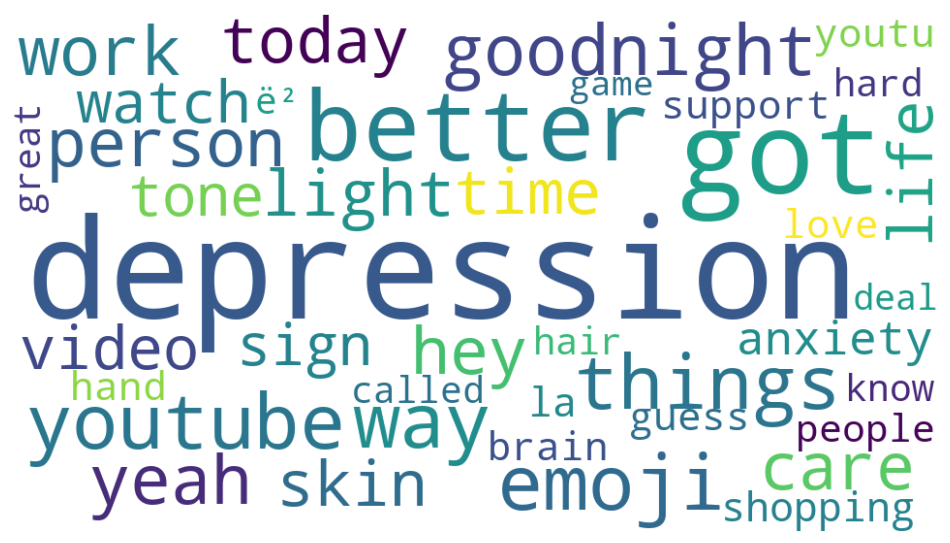

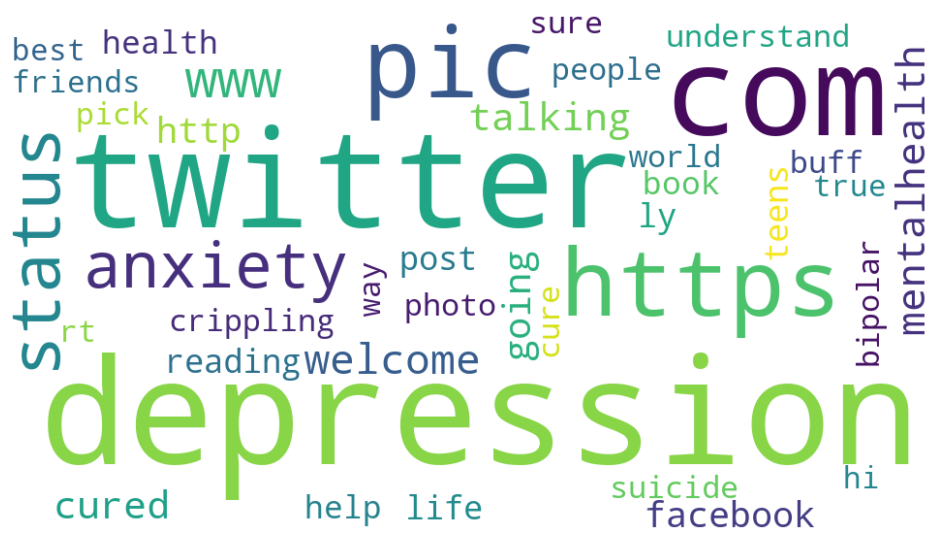

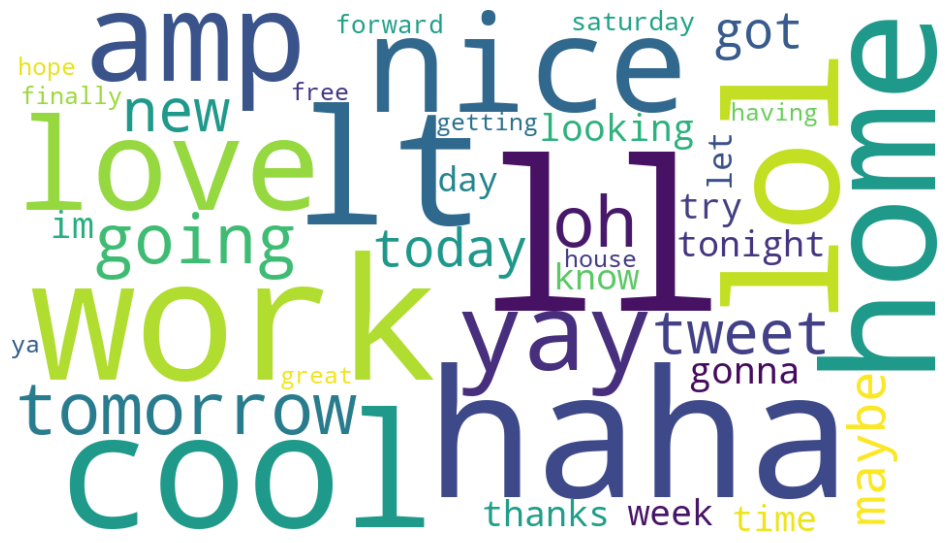

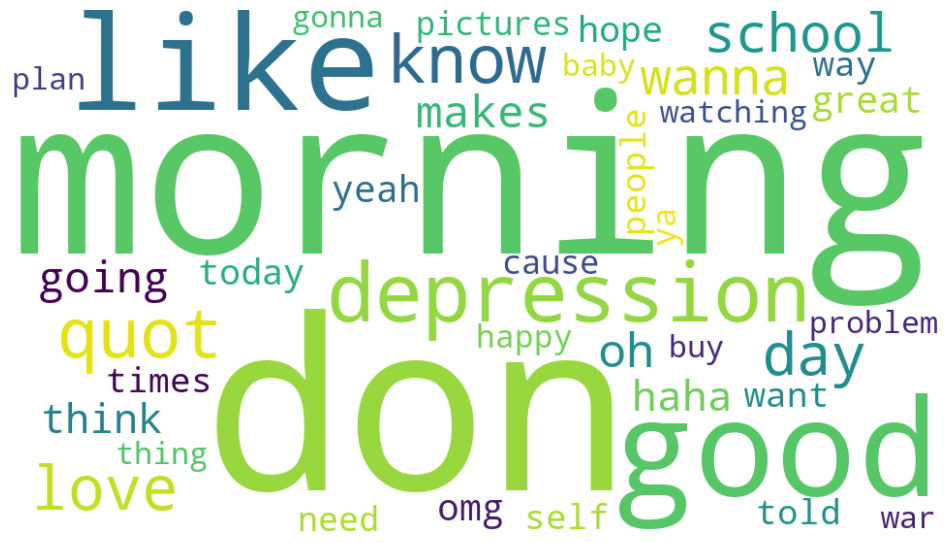

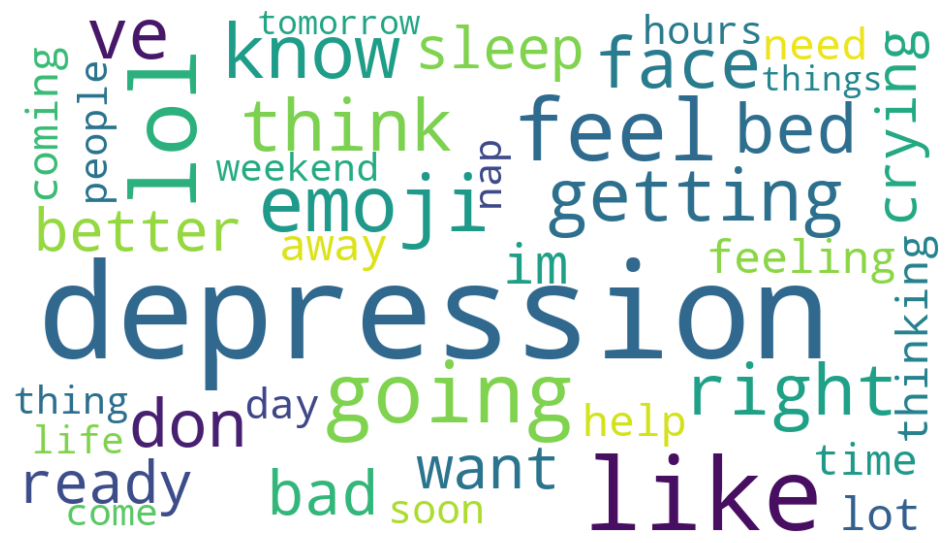

In [28]:
# Wordcloud using matplotlib.pyplot, with customization for the appearance and size.

wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

### TOPIC NAMES GENERATION

In [29]:
# Topic names for NMF Model

topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_text_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)

### TOPIC NAMES GENERATION FOR NMF MODEL

In [30]:
# Generates topic names for topics in an NMF model based on their top words

from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["Index"]))):
    W_year = nmf_text_model.transform(tfidf_para_vectors[np.array(paragraph_df["Index"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

  0%|          | 0/10314 [00:00<?, ?it/s]

/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis

/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis

/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis

/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis

/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))
/var/folders/jw/7chlqd2d6vsfk45pw7q7fmkh0000gn/T/ipykernel_3001/616163556.py:8: RuntimeWarning: invalid value encountered in divide
  year_data.append([year] + list(W_year.sum(axis

### DISTRIBUTION VISUALIZATION

<Axes: xlabel='Index'>

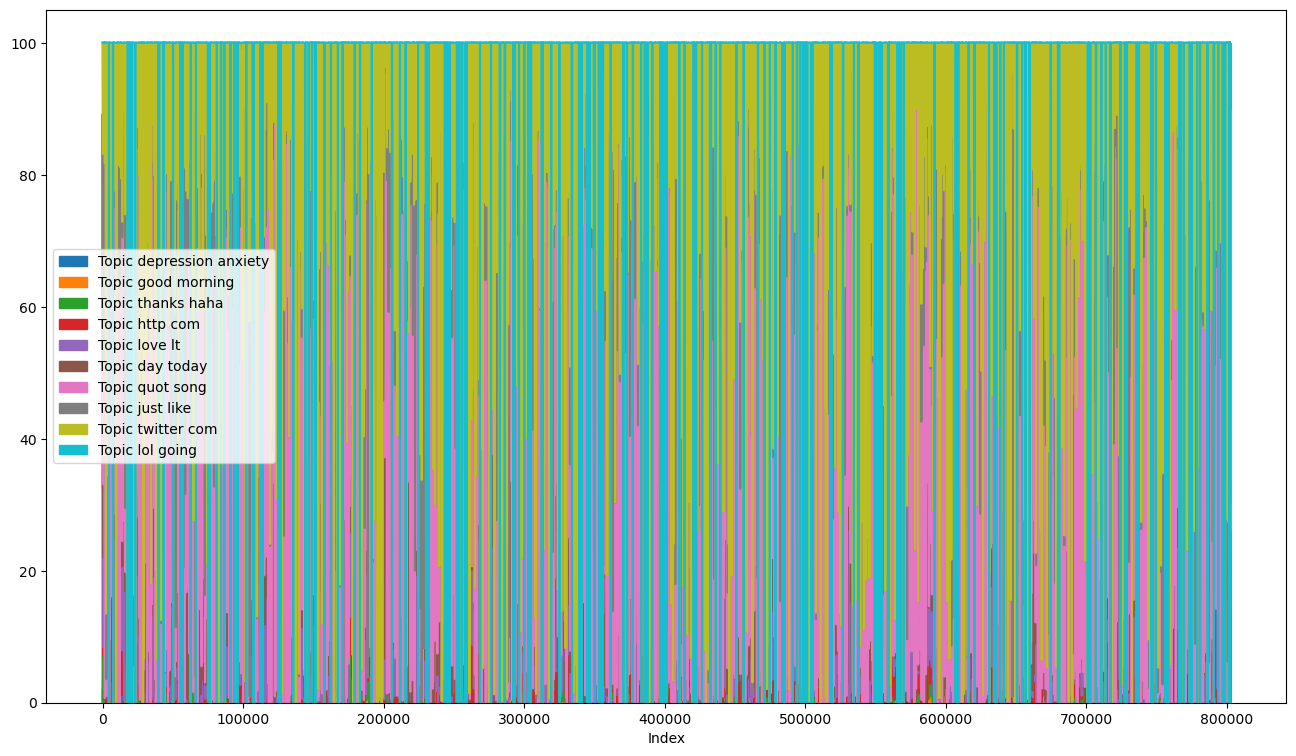

In [32]:
# Imports matplotlib.pyplot as plt and uses it to visualize the distribution

import matplotlib.pyplot as plt

# Assuming you have 10 topics in your NMF model

df_year = pd.DataFrame(year_data, columns=["Index"] + topic_names).set_index("Index")
df_year.plot.area(figsize=(16,9))